# 01. Importing Libraries

In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [3]:
## The main folder path
path= r'E:\Asawer\12.06.2024 Instacart Basket Analysis'

# Import dataset orders_products_merged.pkl
df_cust = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))


In [6]:
df_cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [4]:
## Check the dimensions of the dataframe
df_cust.shape

(206209, 10)

# 03. Wrangling data

In [7]:
## changing data type for some columns in customers dataframe
df_cust['user_id'] = df_cust['user_id'].astype('str')
df_cust['First Name'] = df_cust['First Name'].astype('str')
df_cust['Surnam'] = df_cust['Surnam'].astype('str')
df_cust['Gender'] = df_cust['Gender'].astype('str')
df_cust['STATE'] = df_cust['STATE'].astype('str')
df_cust['fam_status'] = df_cust['fam_status'].astype('str')


In [8]:
## Rename some columns for Clarity and Readability
df_cust.rename(columns = {'First Name' : 'first_name'}, inplace = True)
df_cust.rename(columns = {'Surnam' : 'surname'}, inplace = True)
df_cust.rename(columns = {'Gender' : 'gender'}, inplace = True)
df_cust.rename(columns = {'Age' : 'age'}, inplace = True)
df_cust.rename(columns = {'STATE' : 'state'}, inplace = True)

In [7]:
# Check columns
df_cust.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [8]:
df_cust.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [9]:
## Note: I did not need to drop any columns. I think they are all useful for the analysis

# 04 fundamental data quality and consistency checks

In [10]:
# Checking data-types in the dataframe
df_cust.dtypes

user_id         object
first_name      object
surname         object
gender          object
state           object
age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [9]:
# Checking for mixed data-types in each column
for col in df_cust.columns.tolist():
  weird = (df_cust[[col]].map(type) != df_cust[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_cust[weird]) > 0:
    print (col)

In [12]:
#### Note: no mixed data types were found in each column.

In [13]:
## Check for missing data
df_cust.isnull().sum()

user_id         0
first_name      0
surname         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

In [14]:
#### Note: no missed values were found.

In [15]:
## Check for duplicates
df_cust_dups = df_cust[df_cust.duplicated()]

In [16]:
df_cust_dups

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income


In [17]:
#### no duplicates were found.

# 05 Combine customer data with the rest of the prepared Instacart data.

In [11]:
# Import the rest of the prepared Instacart data
ords_prods_final1= pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_grouped.pkl'))

In [20]:
ords_prods_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [21]:
# Check the shape of the newly imported dataframe
ords_prods_final.shape

(32404859, 25)

In [22]:
# Check the shape of the customers dataframe
df_cust.shape

(206209, 10)

In [23]:
# Identify a shared column
df_cust.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [25]:
ords_prods_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [26]:
### Note: Both dataframes share the 'user_id' column

In [27]:
## Check data-type of shared column
ords_prods_final.dtypes['user_id']

dtype('int64')

In [28]:
df_cust.dtypes['user_id']

dtype('O')

In [29]:
#  change data type of ords_prods_final dataframe into sring.
ords_prods_final['user_id'] = ords_prods_final['user_id'].astype('str')

In [30]:
ords_prods_final.dtypes['user_id']

dtype('O')

In [31]:
# Drop the existing '_merge' column from previous exercises
ords_prods_final = ords_prods_final.drop(columns=['_merge'])

In [34]:
ords_prods_final.shape

(32404859, 24)

In [35]:
ords_prods_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [12]:
## Merge the two dataframes using the column 'user_id' as the shared column with the default join (inner)
custs_ords_prods = ords_prods_final.merge(df_cust, on = 'user_id', indicator = True)

ValueError: You are trying to merge on int64 and object columns for key 'user_id'. If you wish to proceed you should use pd.concat

In [37]:
# Check shape of newly merged dataframe
custs_ords_prods.shape

(32404859, 34)

In [38]:
custs_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [39]:
# Check inner join value counts
custs_ords_prods['_merge'].value_counts()

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [40]:
# Check data-types
custs_ords_prods.dtypes

product_id                       int64
product_name                    object
aisle_id                         int64
department_id                    int64
prices                         float64
order_id                         int64
user_id                         object
order_number                     int64
orders_day_of_week               int64
order_hour_of_day                int64
days_since_prior_order         float64
add_to_cart_order                int64
reordered                        int64
price_range                     object
price_range_loc                 object
busiest_day                     object
busiest_days                    object
busiest_period_of_day           object
max_order                        int64
loyalty_flag                    object
mean_product_price             float64
spending_flag                   object
median_days_between_orders     float64
order_frequency                 object
first_name                      object
surname                  

In [41]:
## Some columns have different data type which need to be fixed:
custs_ords_prods['product_id'] = custs_ords_prods['product_id'].astype('str')
custs_ords_prods['aisle_id'] = custs_ords_prods['aisle_id'].astype('str')
custs_ords_prods['department_id'] = custs_ords_prods['department_id'].astype('str')
custs_ords_prods['order_id'] = custs_ords_prods['order_id'].astype('str')

In [42]:
custs_ords_prods.dtypes

product_id                      object
product_name                    object
aisle_id                        object
department_id                   object
prices                         float64
order_id                        object
user_id                         object
order_number                     int64
orders_day_of_week               int64
order_hour_of_day                int64
days_since_prior_order         float64
add_to_cart_order                int64
reordered                        int64
price_range                     object
price_range_loc                 object
busiest_day                     object
busiest_days                    object
busiest_period_of_day           object
max_order                        int64
loyalty_flag                    object
mean_product_price             float64
spending_flag                   object
median_days_between_orders     float64
order_frequency                 object
first_name                      object
surname                  

# 06 Exporting Data

### custs_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custs_merged.pkl')) _______> I skipped this step to avoid the problem of importing the file again. becuause pandas is not able to read.

In [43]:
# Export dataframe as a pickle file to “Prepared Data” folder.
custs_ords_prods.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs_ords_prods.pkl'))

In [44]:
# Import the dataset:
custs_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs_ords_prods.pkl'))

In [45]:
# Part 2 - Task 4.9 

## 03. Histogram of the “order_hour_of_day” column.

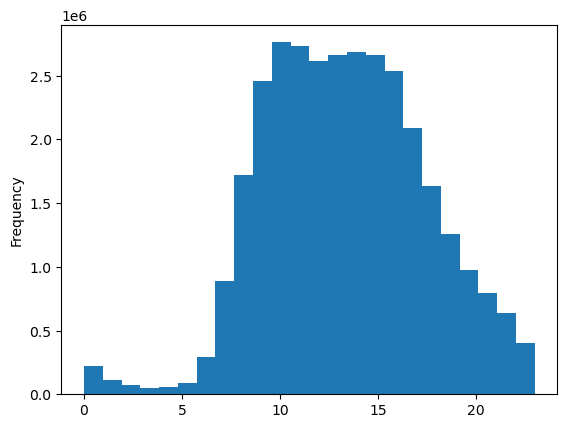

In [46]:
hist = custs_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

Note: The histogram has a bell-shaped distribution. Horizontal Axis (X-axis): Represents the order of the day. The bins range from 0 to just over 24
Vertical Axis (Y-axis): Indicates the frequency of occurrences within each bin.It suggests that the orders reach its peak around 10 am. it indicates that most people prefer to order
between 9:00 am -16:00 pm. 

## 04. Create a bar chart from the “loyalty_flag” column.

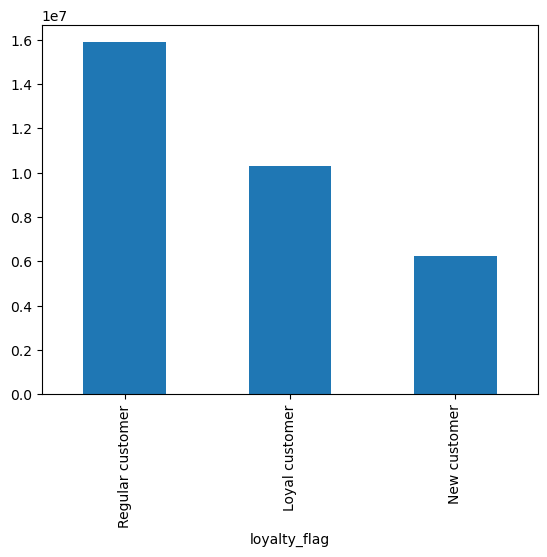

In [48]:
bar = custs_ords_prods['loyalty_flag'].value_counts().plot.bar()

## 05 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

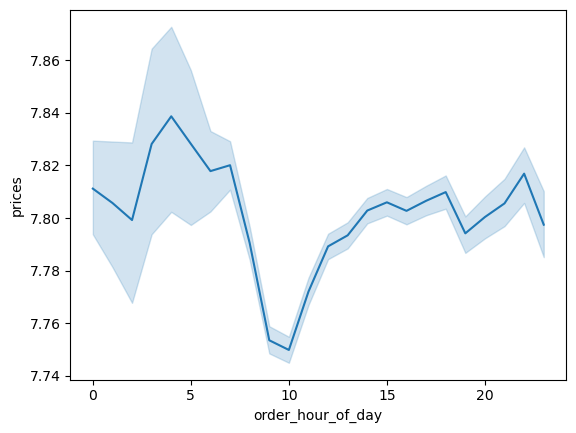

In [49]:
line = sns.lineplot(data = custs_ords_prods, x = 'order_hour_of_day',y = 'prices')

## 06. creat a line chart exploring the connections between age and number of dependents:

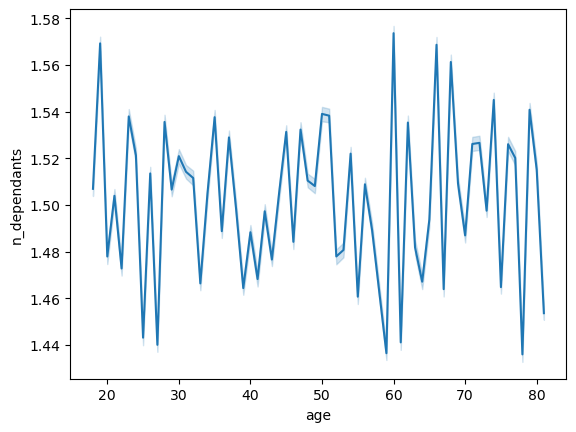

In [50]:
# Create a line chart
line_2 = sns.lineplot(data = custs_ords_prods, x = 'age',y = 'n_dependants')

Note: This line chart does not show any clear pattern betwwen age and number of dependents which indicates no strong relatioship between the two variables.

## 07. Explore whether there’s a connection between age and spending power (income) using a scatterplot

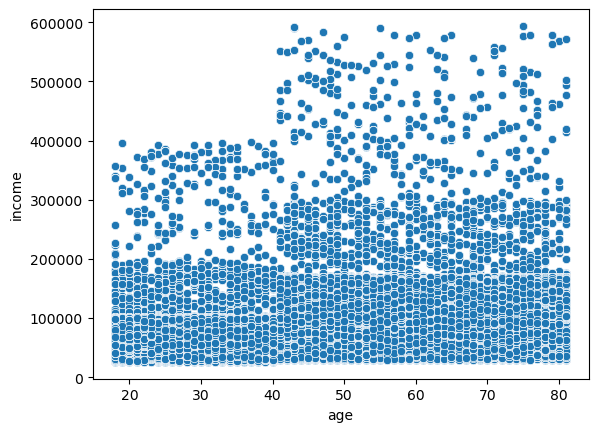

In [51]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = custs_ords_prods)

In [53]:
# Note: The scatter plot shows a dense clustering of points at the lower end of the income scale which might indicate that the majority of people has an icome 
# lower than 200000. but also shows that the income icreases with icreasing age. However, there isn’t a clear correlation or trend between age and income.

## 08. Export your visualizations as “.png” files in your relevant project folder

In [54]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [55]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [56]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [57]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_n_dependants.png'))

In [58]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))

###################################################################################################################################################

# Task 4.10 Coding Etiquette & Excel Reporting

In [60]:
# contents

# 01. mport the data set 

In [61]:
custs_ords_prods.shape

(32404859, 34)

In [62]:
custs_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [63]:
# 02. Address security implications of dataset

In [64]:
## Drop first name and last name columns due to PII
custs_ords_prods.drop(['first_name', 'surname'], axis = 1, inplace = True)

In [65]:
custs_ords_prods

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,7.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,...,7.0,Frequent customer,Female,Rhode Island,47,9/13/2017,1,married,166687,both
32404855,49688,Fresh Foaming Cleanser,73,11,13.5,3401313,200377,1,4,11,...,30.0,Non-frequent customer,Male,West Virginia,25,3/16/2020,0,single,53936,both
32404856,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,...,6.0,Frequent customer,Female,Michigan,57,3/21/2018,1,married,100649,both
32404857,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,...,6.0,Frequent customer,Female,Michigan,57,3/21/2018,1,married,100649,both
